In [ ]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import backend as K

import numpy as np

## What are autoencoders

* Multilayer artificial neural networks
* Uses `representation learning`
* Tries to mimic input at the output
<img src="http://fastforwardlabs.github.io/blog-images/miriam/miriams-figure.png">

### * Map high-dimensional data another space
### * Compression
### * Learn abstract features in an unsupervised way (labeled data is expensive)
### * Denoising and hole-filling
<img src="hole-fill.png">

## Basic autoencoder example


### Build model

In [ ]:
encoding_dim = 32
input_img = Input(shape=(28 * 28, ))
encoded = Dense(encoding_dim, activation='relu', name='encoded')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
plt.imshow(x_train[np.random.randint(0, len(x_train))], cmap='gray')
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
import keras
from IPython.display import clear_output

class Plot(keras.callbacks.Callback):
    def __init__(self, train_data):
        self.train_data = train_data
        self.n_images = 2
        
    def on_batch_end(self, batch, logs=None):
        clear_output(wait=True)
        x_train = self.train_data

        f, axs = plt.subplots(2, self.n_images, figsize=(13, 6))
        for i in range(self.n_images):
            x_constructed = self.model.predict(x_train[i].reshape(1, -1))
            axs[0, i].imshow(x_constructed.reshape(28, 28))          
            axs[1, i].imshow(x_train[i].reshape(28, 28))
        plt.show()


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test, x_test), 
                callbacks=[Plot((x_test))])

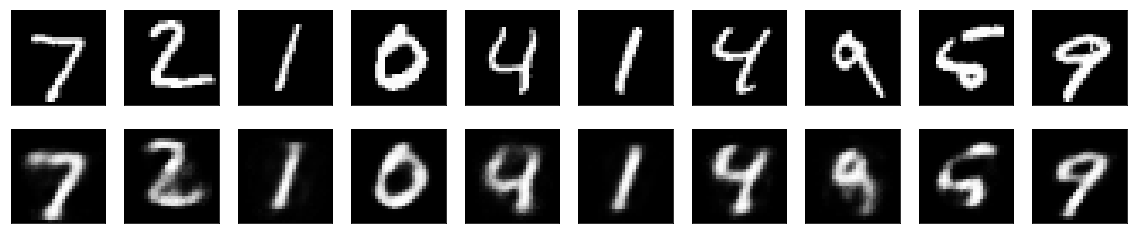

In [85]:
number_of_images = 10
encoded_imgs = encoder.predict(x_test[:number_of_images])
decoded_imgs = decoder.predict(encoded_imgs)

plt.figure(figsize=(20, 4))
for i in range(number_of_images):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Variational Autoencoders

- Probabalistic approach to autoencoders
- learns a Latent Variable Model Instead of learning an arbitrary representation
- Generally no parameter tuning required

<img src="https://cdn-images-1.medium.com/max/2000/1*22cSCfmktNIwH5m__u2ffA.png">

- Vanilla autoencoder is deterministic
- Variational Autoencoder is stochastic. It learns a lattent variable $z$ from inputs $x$

> Probabilistic encoder approximating the true posterior $q(z|x)$.
***
> Generative decoder samples posterior $\hat{q}(z|x)$ aproximation, which does not rely on any particular input x.

- Learning conditional distributions is facilitated by forcing a prior.
$$  z\sim N(0,I). $$

